In [ ]:
import os
import zipfile


zip_file_path = './road_sign_detection.zip'
extraction_path = './road_sign_detection'

os.makedirs(extraction_path, exist_ok=True)

# Extract the ZIP file
try:
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)
    print(f"Extracted files to {extraction_path}")
except Exception as e:
    print(f"Error while extracting the ZIP file: {e}")


image_files = []
try:
    for filename in os.listdir(extraction_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            image_files.append(filename)
except Exception as e:
    print(f"Error while accessing the extraction folder: {e}")


print("Images extracted from the ZIP file:")
for image_file in image_files:
    print(image_file)


Extracted files to ./road_sign_detection
Images extracted from the ZIP file:


In [ ]:
import os
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image

In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:

train_images_path = 'road_sign_detection/Road_Sign_Detection3/train/images'
train_labels_path = 'road_sign_detection/Road_Sign_Detection3/train/labels'

validation_images_path = 'road_sign_detection/Road_Sign_Detection3/valid/images'
validation_labels_path = 'road_sign_detection/Road_Sign_Detection3/valid/labels'

test_images_path = 'road_sign_detection/Road_Sign_Detection3/test'

print('done')

done


In [ ]:
# Perform necessary data transformation and augmentation steps

In [ ]:



transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),  # Convert images to tensors
    transforms.RandomRotation(15), # data augmentation
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize images
])



#  a custom dataset for train and test
class CustomDataset:
    def __init__(self, images_dir, labels_dir, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.images = os.listdir(images_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.images[idx])
        image = Image.open(img_name).convert("RGB")


        label_name = self.images[idx].replace('.jpg', '.txt')
        label_path = os.path.join(self.labels_dir, label_name)


        with open(label_path, 'r') as f:
            label = int(f.readline().strip())

        if self.transform:
            image = self.transform(image)

        return image, label


train_dataset = CustomDataset(images_dir=train_images_path, labels_dir=train_labels_path, transform=transform)
test_dataset = CustomDataset(images_dir=test_images_path, labels_dir=test_labels_path, transform=transform)  # No augmentation for test set


train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


print(f"Number of batches in train loader: {len(train_loader)}")


Number of batches in train loader: 167


In [ ]:
# 8. Plot some random images from the train, test, and validation set.

Training Dataset Random Images:


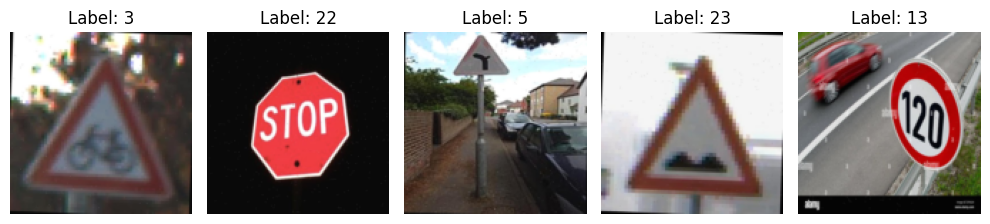

Validation Dataset Random Images:


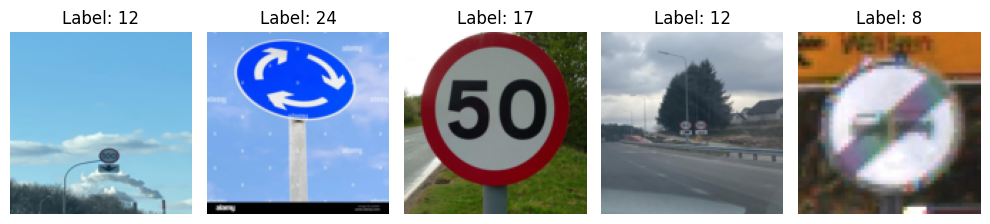

Test Dataset Random Images:


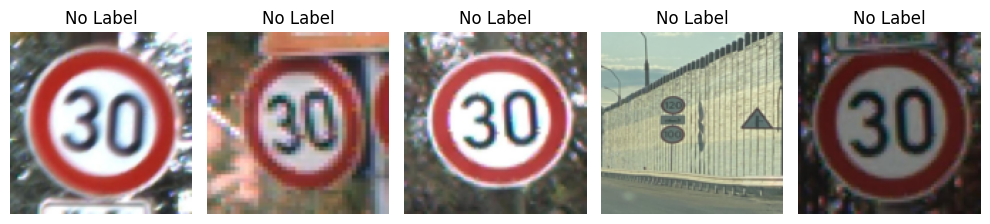

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image


train_images_path = 'road_sign_detection/Road_Sign_Detection3/train/images'
train_labels_path = 'road_sign_detection/Road_Sign_Detection3/train/labels'

validation_images_path = 'road_sign_detection/Road_Sign_Detection3/valid/images'
validation_labels_path = 'road_sign_detection/Road_Sign_Detection3/valid/labels'

test_images_path = 'road_sign_detection/Road_Sign_Detection3/test'


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


class CustomDataset:
    def __init__(self, images_dir, labels_dir=None, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.images = os.listdir(images_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.images[idx])
        image = Image.open(img_name).convert("RGB")


        label = None
        if self.labels_dir is not None:
            label_name = self.images[idx].replace('.jpg', '.txt')
            label_path = os.path.join(self.labels_dir, label_name)


            with open(label_path, 'r') as f:
                label_line = f.readline().strip()
                label = int(label_line.split()[0])

        if self.transform:
            image = self.transform(image)

        return image, label


train_dataset = CustomDataset(images_dir=train_images_path, labels_dir=train_labels_path, transform=transform)
validation_dataset = CustomDataset(images_dir=validation_images_path, labels_dir=validation_labels_path, transform=transform)
test_dataset = CustomDataset(images_dir=test_images_path, transform=transform)  # No labels for test dataset


train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)


def display_random_images(dataset, num_images=5):
    plt.figure(figsize=(10, 10))
    indices = random.sample(range(len(dataset)), num_images)
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        image = transforms.ToPILImage()(image)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image)
        plt.title(f'Label: {label}' if label is not None else 'No Label')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


print("Training Dataset Random Images:")
display_random_images(train_dataset)

print("Validation Dataset Random Images:")
display_random_images(validation_dataset)

print("Test Dataset Random Images:")
display_random_images(test_dataset)


In [ ]:
# Custom model with IOU
#  Pick one model of your choice and implement it from scratch to perform object detection


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from PIL import Image

# Define paths
train_images_path = 'road_sign_detection/Road_Sign_Detection3/train/images'
train_labels_path = 'road_sign_detection/Road_Sign_Detection3/train/labels'
validation_images_path = 'road_sign_detection/Road_Sign_Detection3/valid/images'
validation_labels_path = 'road_sign_detection/Road_Sign_Detection3/valid/labels'
test_images_path = 'road_sign_detection/Road_Sign_Detection3/test'


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

class CustomDataset:
    def __init__(self, images_dir, labels_dir=None, transform=None):
        self.images_dir = images_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.images = os.listdir(images_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.images_dir, self.images[idx])
        image = Image.open(img_name).convert("RGB")


        label = None
        bbox = None
        if self.labels_dir is not None:
            label_name = self.images[idx].replace('.jpg', '.txt')
            label_path = os.path.join(self.labels_dir, label_name)


            if os.path.exists(label_path) and os.path.getsize(label_path) > 0:
                with open(label_path, 'r') as f:
                    label_line = f.readline().strip()
                    if label_line:
                        parts = label_line.split()
                        label = int(parts[0])

                        bbox = list(map(float, parts[1:]))
                    else:
                        label = -1
            else:
                label = -1

        if self.transform:
            image = self.transform(image)

        return image, label, bbox

def custom_collate_fn(batch):
    batch = [b for b in batch if b[1] != -1]
    if not batch:
        return torch.empty(0), torch.empty(0), torch.empty(0)
    images, labels, bboxes = zip(*batch)
    return torch.stack(images), torch.tensor(labels), bboxes

# Load the datasets
train_dataset = CustomDataset(images_dir=train_images_path, labels_dir=train_labels_path, transform=transform)
validation_dataset = CustomDataset(images_dir=validation_images_path, labels_dir=validation_labels_path, transform=transform)
test_dataset = CustomDataset(images_dir=test_images_path, transform=transform)  # No labels for test dataset

#  data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True, collate_fn=custom_collate_fn)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=32, shuffle=False, collate_fn=custom_collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

Epoch [1/25], Loss: 2.1768, Accuracy: 35.10%
Epoch [2/25], Loss: 0.9449, Accuracy: 71.90%
Epoch [3/25], Loss: 0.2917, Accuracy: 91.57%
Epoch [4/25], Loss: 0.0987, Accuracy: 97.74%
Epoch [5/25], Loss: 0.0399, Accuracy: 99.27%
Epoch [6/25], Loss: 0.0650, Accuracy: 98.38%
Epoch [7/25], Loss: 0.0580, Accuracy: 98.61%
Epoch [8/25], Loss: 0.0275, Accuracy: 99.30%
Epoch [9/25], Loss: 0.0052, Accuracy: 99.92%
Epoch [10/25], Loss: 0.0048, Accuracy: 99.92%
Epoch [11/25], Loss: 0.0054, Accuracy: 99.92%
Epoch [12/25], Loss: 0.0023, Accuracy: 99.96%
Epoch [13/25], Loss: 0.0011, Accuracy: 99.96%
Epoch [14/25], Loss: 0.0013, Accuracy: 99.94%
Epoch [15/25], Loss: 0.0008, Accuracy: 99.96%
Epoch [16/25], Loss: 0.0008, Accuracy: 99.96%
Epoch [17/25], Loss: 0.0007, Accuracy: 99.98%
Epoch [18/25], Loss: 0.0007, Accuracy: 99.98%
Epoch [19/25], Loss: 0.0015, Accuracy: 99.96%
Epoch [20/25], Loss: 0.0020, Accuracy: 99.96%
Epoch [21/25], Loss: 0.1020, Accuracy: 97.40%
Epoch [22/25], Loss: 0.1789, Accuracy: 94.6

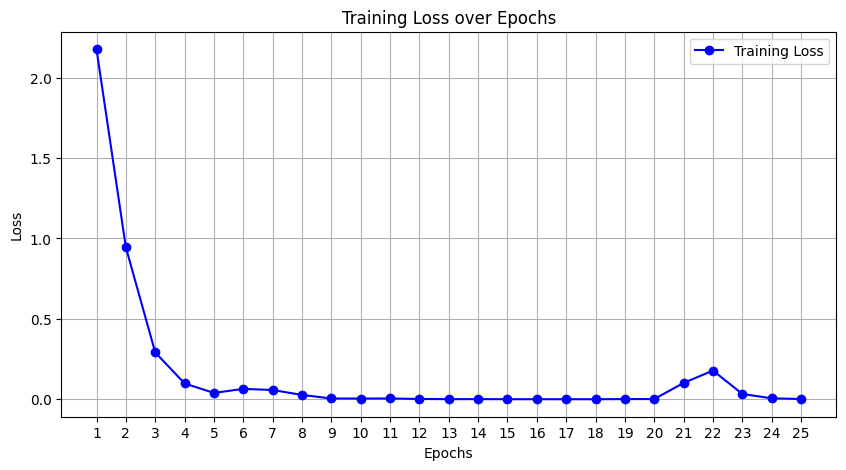

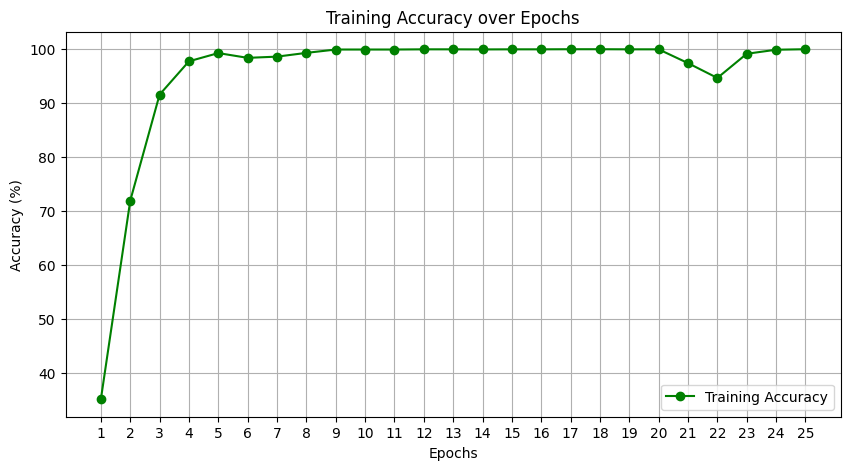

In [ ]:
# Custom CNN Model Definition
class CustomCNN(nn.Module):
    def __init__(self, num_classes):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.dropout = nn.Dropout(p=0.2)

        self.fc1 = nn.Linear(128 * 16 * 16, 256)
        self.fc_class = nn.Linear(256, num_classes)
        self.fc_bbox = nn.Linear(256, 4)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = x.view(-1, 128 * 16 * 16)
        x = F.relu(self.fc1(x))

        class_output = self.fc_class(x)
        bbox_output = self.fc_bbox(x)

        return class_output, bbox_output


num_classes = 25
num_epochs = 25
learning_rate = 0.001


model = CustomCNN(num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


epoch_losses = []
epoch_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for batch in train_loader:
        if batch is None:
            continue
        images, labels, bboxes = batch


        optimizer.zero_grad()


        class_outputs, bbox_outputs = model(images)


        loss = criterion(class_outputs, labels)


        loss.backward()
        optimizer.step()

        running_loss += loss.item()


        _, predicted = torch.max(class_outputs, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)


    average_loss = running_loss / len(train_loader)
    accuracy = 100 * correct_predictions / total_predictions

    epoch_losses.append(average_loss)
    epoch_accuracies.append(accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_losses, marker='o', color='b', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(1, num_epochs + 1))
plt.grid()
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), epoch_accuracies, marker='o', color='g', label='Training Accuracy')
plt.title('Training Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1, num_epochs + 1))
plt.grid()
plt.legend()
plt.show()


In [ ]:
def calculate_iou(bbox1, bbox2):
    """
    Calculate the Intersection over Union (IoU) of two bounding boxes.

    Parameters:
    bbox1: List or Tensor of [x1, y1, x2, y2] for predicted bounding box
    bbox2: List or Tensor of [x1, y1, x2, y2] for ground truth bounding box

    Returns:
    IoU: Intersection over Union (float)
    """

    if not isinstance(bbox1, torch.Tensor):
        bbox1 = torch.tensor(bbox1, dtype=torch.float32)
    if not isinstance(bbox2, torch.Tensor):
        bbox2 = torch.tensor(bbox2, dtype=torch.float32)


    x1 = torch.max(bbox1[0], bbox2[0])
    y1 = torch.max(bbox1[1], bbox2[1])
    x2 = torch.min(bbox1[2], bbox2[2])
    y2 = torch.min(bbox1[3], bbox2[3])

    intersection = torch.max(torch.tensor(0.0), x2 - x1) * torch.max(torch.tensor(0.0), y2 - y1)


    area_bbox1 = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
    area_bbox2 = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])
    union = area_bbox1 + area_bbox2 - intersection


    iou = intersection / union if union > 0 else torch.tensor(0.0)

    return iou.item()


In [ ]:
def calculate_iou_loss(pred_bboxes, true_bboxes):
    """
    Calculate the IoU loss for a batch of predictions and ground truths.

    Parameters:
    pred_bboxes: Tensor of predicted bounding boxes (N, 4)
    true_bboxes: Tensor of ground truth bounding boxes (N, 4)

    Returns:
    IoU loss: Mean IoU loss for the batch
    """
    loss = 0.0
    for pred_bbox, true_bbox in zip(pred_bboxes, true_bboxes):
        iou = calculate_iou(pred_bbox, true_bbox)
        loss += (1 - iou)

    return loss / len(pred_bboxes) if len(pred_bboxes) > 0 else 0

In [ ]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_iou_loss = 0.0

    for batch in train_loader:
        if batch is None:
            continue
        images, labels, bboxes = batch

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        class_outputs, bbox_outputs = model(images)

        # Compute loss for classification
        loss = criterion(class_outputs, labels)

        # This assumes bbox_outputs is in some other format
        iou_loss = calculate_iou_loss(bbox_outputs, bboxes)

        # Total loss
        total_loss = loss + iou_loss

        # Backward pass and optimize
        total_loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_iou_loss += iou_loss


    average_loss = running_loss / len(train_loader)
    average_iou_loss = running_iou_loss / len(train_loader)
    epoch_losses.append(average_loss)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}, IoU Loss: {average_iou_loss:.4f}')


Epoch [1/25], Loss: 0.0008, IoU Loss: 0.9997
Epoch [2/25], Loss: 0.0020, IoU Loss: 0.9997
Epoch [3/25], Loss: 0.0007, IoU Loss: 0.9997
Epoch [4/25], Loss: 0.0009, IoU Loss: 0.9997
Epoch [5/25], Loss: 0.0006, IoU Loss: 0.9997
Epoch [6/25], Loss: 0.0017, IoU Loss: 0.9997
Epoch [7/25], Loss: 0.0010, IoU Loss: 0.9997
Epoch [8/25], Loss: 0.0016, IoU Loss: 0.9997
Epoch [9/25], Loss: 0.0019, IoU Loss: 0.9996
Epoch [10/25], Loss: 0.0019, IoU Loss: 0.9996
Epoch [11/25], Loss: 0.0020, IoU Loss: 0.9996
Epoch [12/25], Loss: 0.0012, IoU Loss: 0.9996
Epoch [13/25], Loss: 0.0006, IoU Loss: 0.9997
Epoch [14/25], Loss: 0.0014, IoU Loss: 0.9996
Epoch [15/25], Loss: 0.0010, IoU Loss: 0.9996
Epoch [16/25], Loss: 0.0012, IoU Loss: 0.9996
Epoch [17/25], Loss: 0.0017, IoU Loss: 0.9997
Epoch [18/25], Loss: 0.0015, IoU Loss: 0.9995
Epoch [19/25], Loss: 0.1728, IoU Loss: 0.9997
Epoch [20/25], Loss: 0.0489, IoU Loss: 0.9995
Epoch [21/25], Loss: 0.0116, IoU Loss: 0.9998
Epoch [22/25], Loss: 0.0026, IoU Loss: 0.99

In [ ]:
# Save the trained model
model_save_path = 'custom_cnn_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to custom_cnn_model.pth


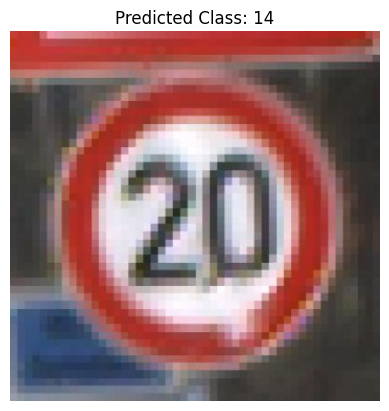

Predicted Class: 14


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = CustomCNN(num_classes=25)
model.load_state_dict(torch.load('custom_cnn_model.pth'))
model.eval()


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


def infer(image_path):

    image = Image.open(image_path).convert("RGB")
    image_transformed = transform(image)
    image_transformed = image_transformed.unsqueeze(0)

    with torch.no_grad():
        outputs = model(image_transformed)


        if isinstance(outputs, tuple):
            outputs = outputs[0]
        _, predicted = torch.max(outputs, 1)


    plt.imshow(image)
    plt.title(f'Predicted Class: {predicted.item()}')
    plt.axis('off')
    plt.show()

    return predicted.item()


image_path = 'testing.jpg'
predicted_class = infer(image_path)
print(f'Predicted Class: {predicted_class}')
